<h4>This exercise is a continuation of using my chosen dataset for the the Feature Engineering. Here I use some tools for the 
Optimal Variable Selection</h4>

In [35]:
# importing the necessary python Libraries
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# the new dataset to work with
# Read the CSV new file
df = pd.read_csv("white_wine_cleaned.csv")

# the code below removes all the duplicate
df.drop_duplicates(keep=False, inplace=True)

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,6.20,0.32,0.16,7.00,0.04,30.00,136.00,0.99,3.18,0.47,9.60,6
9,8.10,0.22,0.43,1.50,0.04,28.00,129.00,0.99,3.22,0.45,11.00,6
10,8.10,0.27,0.41,1.45,0.03,11.00,63.00,0.99,2.99,0.56,12.00,5
11,8.60,0.23,0.40,4.20,0.04,17.00,109.00,0.99,3.14,0.53,9.70,5
12,7.90,0.18,0.37,1.20,0.04,16.00,75.00,0.99,3.18,0.63,10.80,5


In [22]:
# this checked to ensure there are no duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

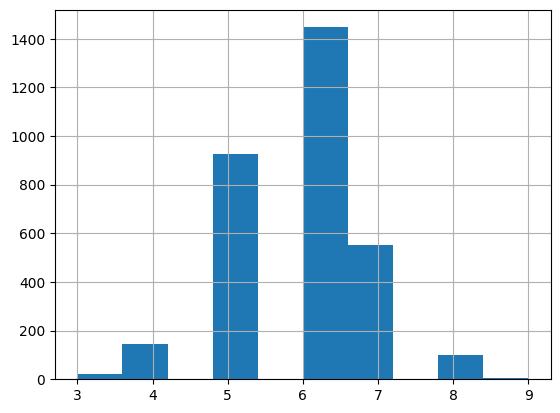

In [23]:
# this shows the histogram of 
# targeted variable "quality"
# the histogram plot shows that
# the 'quality' 6 is most represented
# follow by 5 and then 7
df["quality"].hist()

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
# the train/test 
# X = the other variables that make the dataset
# and y which is the targeted variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = df['quality']

<h4>The Fisher_score method/tool</h4>

<Axes: >

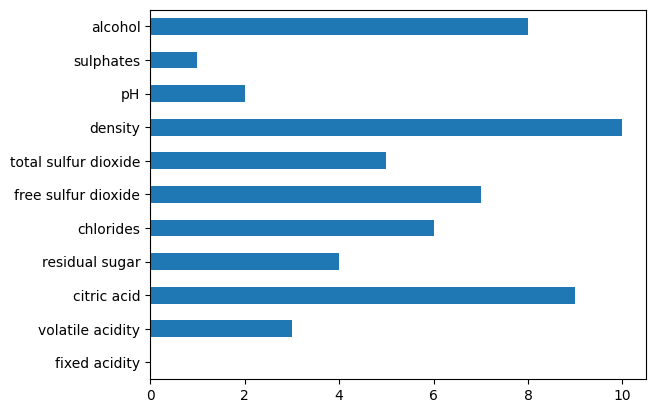

In [26]:
# I install 'pip install skfeature-chappers'
# sulphates is the lowest and 
# follow by pH, 
# fixed acidity is absolutely not existed 
# interestingly, the 'density' is the highest
# next by citric acid
# the variable 'alcohol' is quite high too
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

<h4>The SelectKBest and Chi-squared methods</h3>

In [27]:
# the SelectKBest method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
6,total sulfur dioxide,2757.15
5,free sulfur dioxide,830.32
3,residual sugar,439.85
10,alcohol,114.43
1,volatile acidity,42.60
7,density,18.26
0,fixed acidity,8.51
2,citric acid,4.83
9,sulphates,2.41
8,pH,0.47


<h4>The SelectKBest Test </h4>
<ul>
<li>I used the SelectKBest which is a variable/feature selector </li>
<li>(feature selection method)</li>
<li>helps select the highly important variables which is related</li>
<li>according to how their scoring features function. </li>
<li>Also, it showed the scores in descending form of order. </li>
<li>and the higher the feature score the highly important the feature is,</li>
<li>The information given by the outcome showed</li>
<li>that the features that has higher scores </li>
<li>i.e total sulfur dioxide, followed by free sulfur dioxide, </li>
<li>residual sugar, density etc.</li>
<li>I believe this shows that </li>
<li>features with the higher scores</li>
<li>are very much key factor when it comes to the training the model </li>
<li>predicting the target variable which is the quality of the wine. </li>
<li>Also it can be seen that the quality (feature) had </li>
<li>somehow high score that showed it is of high importance too.</li>
<li>The feature Chlorides has a NaN score, </li>
<li>which I believe it is either a missing value or </li>
<li>perhaps, its an invalid data for the feature.</li>
</ul>

<h4>The Chi-squared Test</h4>
<ul> 
<li>The chi-squared test showed the statistical test</li>
<li>which reveal the key factor or connection</li> 
<li>between the category variables.</li> 
<li>The test shows the frequencies of the category variables </li>
<li>and compared it to the expected frequency independently in this case . </li>
<li>Then indicated by measuring the dependency</li> 
<li>between each feature and the target variable</li> 
<li>which in this the 'quality' of the wine.</li> 
<li>And, the higher chi-squared scores reveal there is</li> 
<li>more correlations between the features (variables) and the targeted variable.</li>
</ul>

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
# typical X/y -split
X = df.drop("quality", axis=1)
y = df['quality']

# a good idea: if you are going to use e.g. XGBoost for your actual ML model later
# use XGBoost also here, so that you get the optimal variables from the point of view of XGBoost
model = RandomForestRegressor()

# create RFE, place the model and choose amount of optimal variables
rfe = RFE(estimator=model, n_features_to_select=7)

# fit the RFE model with our data
rfe.fit(X, y)

# get rankings and the results
rankings = rfe.ranking_
support = rfe.support_

# build a new DataFrame just to show results of RFE
results_df = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rankings,
    "Selected": support
}).sort_values(by="Ranking")

# these results accompanied with any other knowledge you
# have regarding dataset (other analysis tools but also domain knowledge)
# you can decide the most important variables
results_df

,Feature,Ranking,Selected
1,volatile acidity,1,True
3,residual sugar,1,True
6,total sulfur dioxide,1,True
5,free sulfur dioxide,1,True
9,sulphates,1,True
10,alcohol,1,True
8,pH,1,True
4,chlorides,2,False
0,fixed acidity,3,False
2,citric acid,4,False


In [ ]:
# typical X/y -split
X = df.drop("quality", axis=1)
y = df['quality']

# define model (linear regression in this example)
# technically you can use pretty much any classic ML algorithm
model = LinearRegression()

# a good idea: if you are going to use e.g. XGBoost for your actual ML model later
# use XGBoost also here, so that you get the optimal variables from the point of view of XGBoost
# model = RandomForestRegressor()

# create RFE, place the model and choose amount of optimal variables
rfe = RFE(estimator=model, n_features_to_select=7)

# fit the RFE model with our data
rfe.fit(X, y)

# get rankings and the results
rankings = rfe.ranking_
support = rfe.support_

# build a new DataFrame just to show results of RFE
lr_results_df = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rankings,
    "Selected": support
}).sort_values(by="Ranking")

# these results accompanied with any other knowledge you
# have regarding dataset (other analysis tools but also domain knowledge)
# you can decide the most important variables
lr_results_df

,Feature,Ranking,Selected
1,volatile acidity,1,True
2,citric acid,1,True
7,density,1,True
4,chlorides,1,True
9,sulphates,1,True
10,alcohol,1,True
8,pH,1,True
3,residual sugar,2,False
0,fixed acidity,3,False
5,free sulfur dioxide,4,False


In [37]:
# Assuming 'lr_results_df' contains the RFE results for LinearRegression
# Extract the selected features based on RFE
selected_features = lr_results_df[lr_results_df["Selected"] == True]["Feature"].tolist()

In [38]:
# Prepare the dataset with selected features
X_selected = X[selected_features]
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Make predictions on the test set
# y_pred = lr_model.predict(X_test)
test_predictions = lr_model.predict(X_test)

# we need to calculate test predictions based on the TEST DATA SET
# for metrics that follow
# test_predictions = model.predict(X_test)

In [41]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "%")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "%^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "%")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
0.61 %

MSE
0.65 %^2

RMSE:
0.81 %

R-squared:
0.27

Explained variance score:
0.27


<b>Analysing The Model Output</b>

<h4>Mean Absolute Error (MAE)-
value: 0.61%
 measure the average magnitude of errors between the predicted and actual values. An MAE of 0.61% indicates that, on average, the model's predictions deviate from the true values by 0.61%. This relatively low error suggests that the model provides reasonably accurate predictions.</h4>
 <h4>Mean Squared Error (MSE)
with the value: 0.65%^2: is the average of the squared differences between predicted and actual values. It penalizes larger errors more than smaller ones. An MSE of 0.65%^2 indicates that the overall error magnitude remains low. However, the squaring of errors can make it harder to interpret directly compared to MAE.</h4>
 <h4>The Root Mean Squared Error (RMSE)
and value: 0.81%: is the square root of the MSE, bringing the error units back to the same scale as the target variable. An RMSE of 0.81% is slightly higher than the MAE, which is expected because RMSE penalizes larger errors more. It indicates how far off the model's predictions typically are.</h4>
<h4>R-squared (R²)
 and value: 0.27
: measures the proportion of variance in the target variable (y_test) that the model explains. An R² value of 0.27 means that only 27% of the variance in the test data is explained by the model. This low value suggests that the model does not capture all the important relationships in the dataset, and there might be room for improvement, such as feature engineering, trying different models, or obtaining more data.</h4>
<h4>Explained Variance Score
and value: 0.27:
quite similar to R² but focuses specifically on the variance captured by the model. A score of 0.27 aligns with the R² result, indicating that the model struggles to fully explain the variability in the dataset.</h4>

<h4><b>My thoughts on the Linear Regression Model</b></h4>
<h4>The low R² and explained variance scores (0.27) suggest that the Linear Regression model is not the best fit for the given data. While the errors (MAE, MSE, RMSE) are relatively small, the model does not explain much of the data's variability. I also think, considering trying more complex models like Random Forest, XGBoost, or Neural Networks, which might capture non-linear relationships better.</h4>


In [ ]:
# This is to display the the model coefficients
coefficients = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": lr_model.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
            Feature  Coefficient
0  volatile acidity        -1.88
1       citric acid         0.22
2           density        11.00
3         chlorides        -0.96
4         sulphates         0.15
5           alcohol         0.35
6                pH         0.52


<h4>Highly Most Influential Features are density has the highest positive coefficient (11.00), making it the most influential feature in predicting quality.
And volatile acidity has the largest negative impact, significantly reducing quality when it increases.</h4>
<h4>Features with Mild Effects such features as citric acid, sulphates, and pH have smaller coefficients, meaning their impact on quality is less pronounced compared to density or volatile acidity.</h4>

<Axes: >

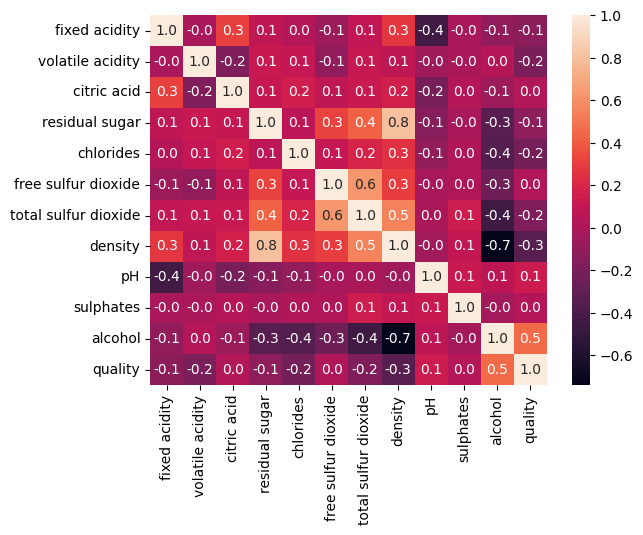

In [32]:
# it seems the selections are not far away from correlations
# this might imply the data is more or less linear (since we used linear regression)
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [18]:
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables are listed below
# leave out the target variable! (dependent variable)
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

# have only the target variable here (dependent variable)
y = df['quality']

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, potentially confusing the ML algorithm
# this might be good info when deciding if some variable needs to be removed
vif_data

,feature,VIF
0,fixed acidity,84.38
1,volatile acidity,9.49
2,citric acid,10.19
3,residual sugar,3.29
4,chlorides,5.60
5,free sulfur dioxide,9.01
6,total sulfur dioxide,24.20
7,density,1041.71
8,pH,600.71
9,sulphates,20.86
